In [1]:
import pandas as pd

In [ ]:
#https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/

In [2]:
from nsepy import get_history as gh
import datetime as dt
import yfinance as yf
stock_symbol = "RELIANCE.NS"  #NSE stocks usually end with .NS
#download stock data
stk_data = yf.download(stock_symbol,start="2023-01-01",end="2023-07-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [3]:
stk_data=stk_data[["Open","High","Low","Close"]]


In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data[["Close"]])
print("Len:",data1.shape)

Len: (122, 1)


In [5]:
training_size = round(len(data1 ) * 0.95)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size:]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size:]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

116
X_train length: (116, 1)
X_test length: (6, 1)
y_train length: (116, 1)
y_test length: (6, 1)


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
from sklearn.metrics import mean_squared_error
orders=[(1,0,2),(1,0,1),(2,0,1),(1,0,1)]
#orderslist=[]
#rscorelist=[]
for i in orders:
    #orderslist.append(i)
    from statsmodels.tsa.arima.model import ARIMA
    model = ARIMA(data1, order=i)
    model_fit = model.fit()
    # make prediction
    y_pred= model_fit.predict(0, len(data1)-1)
    #print(y_pred)
    from stockFunctions import rmsemape
    rmsemape(data1,y_pred)
    

RMSE-Testset: 0.005406145635665491
maPe-Testset: 44024728.67751028
RMSE-Testset: 0.005388400064104143
maPe-Testset: 44032761.50477655
RMSE-Testset: 0.005393969487783708
maPe-Testset: 44030284.71974576
RMSE-Testset: 0.005388400064104143
maPe-Testset: 44032761.50477655


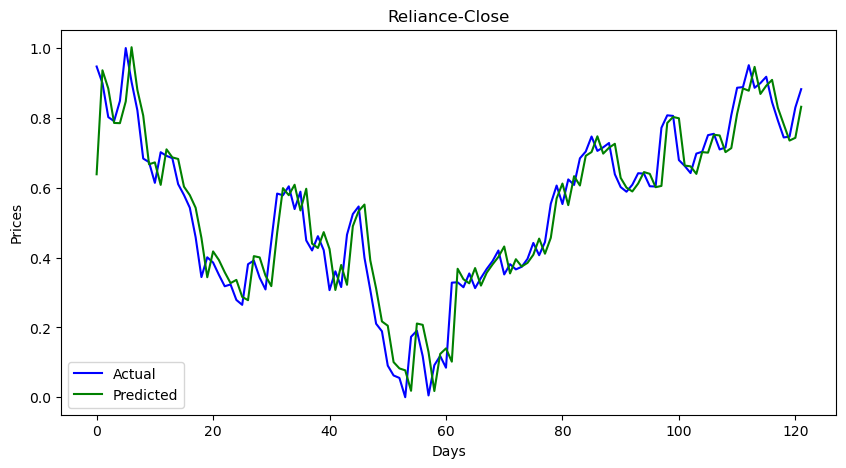

In [8]:
from stockFunctions import graph
graph(data1,y_pred,"Actual","Predicted","Reliance-Close","Days","Prices")

In [9]:
len(data1)

122

In [10]:
from stockFunctions import conversionSingle
aTestNormTable=conversionSingle(data1,["Close"])
actual_stock_price_test_ori=Ms.inverse_transform(aTestNormTable)
actual_stock_price_test_oriA=conversionSingle(actual_stock_price_test_ori,["Close"])

In [11]:
from stockFunctions import conversionSingle
pTestNormTable=conversionSingle(y_pred,["Close"])
predicted_stock_price_test_ori=Ms.inverse_transform(pTestNormTable)
predicted_stock_price_test_oriP=conversionSingle(predicted_stock_price_test_ori,["Close"])

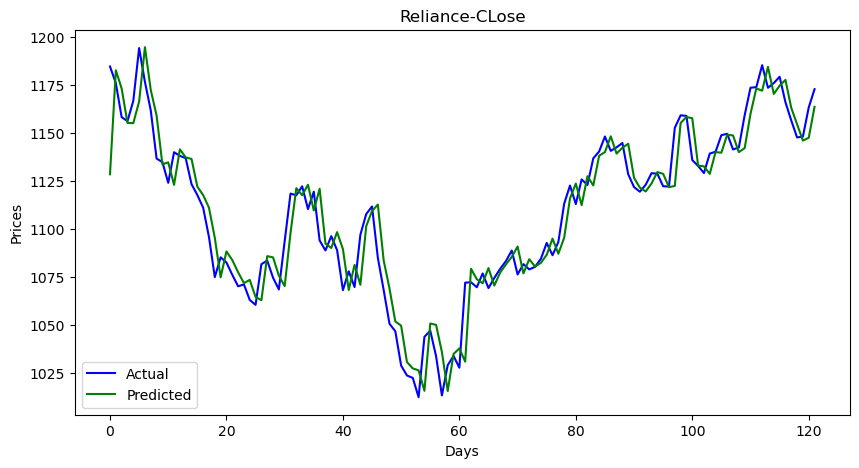

In [13]:
from stockFunctions import graph
graph(actual_stock_price_test_oriA,predicted_stock_price_test_oriP,"Actual","Predicted","Reliance-CLose","Days","Prices")

In [14]:
from stockFunctions import rmsemape
rmsemape(actual_stock_price_test_oriA,predicted_stock_price_test_oriP)

RMSE-Testset: 178.29638696035116
maPe-Testset: 0.9030225250491899


(178.29638696035116, 0.9030225250491899)

In [15]:
forecast=model_fit.predict(len(data1), len(data1)+3)

In [16]:
forecast

array([0.87777827, 0.86752876, 0.85771838, 0.84832834])

In [17]:
from stockFunctions import conversionSingle
fTestNormTable=conversionSingle(forecast,["Closefore"])
forecast_stock_price_test_ori=Ms.inverse_transform(fTestNormTable)
forecast_stock_price_test_oriF=conversionSingle(forecast_stock_price_test_ori,["Closefore"])

In [18]:
forecast_stock_price_test_oriF.to_csv("Closets.csv",index=False)

In [19]:
forecast_stock_price_test_oriF

,Closefore
0,1171.971648
1,1170.107224
2,1168.322682
3,1166.614598
